# multilayered perceptrons
creating a neural networkd having

input-2 parametes
output-2 parameters
2 hidden layers with 4 and 3 neurons respectively

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons


In [2]:
def sigmoid(x):
    #sigmoid
    return 1/(1+np.exp(-x));
    #relu function
    y=x
    y[x<0]=0
    return y

def relu(x):
    #relu function
    y=x
    y[x<0]=0
    return y


def tan_inv(x):
    #tanh
    return np.tanh(x)

activations={'sigmoid':sigmoid,'relu':relu,'tanh':tan_inv}

def sigmoid_diff(x):
    # first differential of activation function
    #sigmoid:
    """
    sigmoid'(x)=sigmoid(x)*(1-sigmoid(x))
    """
    sig=sigmoid(x)
    return sig*(1-sig) # element wise multiplication
def relu_diff(x):
    # first differential of activation function
    #relu:
    y=x
    y[x<0]=0
    y[x>0]=1
    return y
def tanh_diff(x):
    # first differential of activation function
    #tanh
    y=tan_inv(x)
    return (1-np.square(y))
activations_differential={'sigmoid':sigmoid_diff,'relu':relu_diff,'tanh':tanh_diff}


# generating the datset 
generate datasets, having two attributes and also belonging to two classes

In [111]:
def generate_dataset(type):
    if(type=='moons'or type=='moon'):
        X,Y=make_moons(n_samples=500,noise=0.2)
        return (X,Y)
    if(type=='circles'or type=='circle'):
        X,Y=make_circles(n_samples=500,  shuffle=True, noise=0.05, random_state=1, factor=0.8)
        return (X,Y)
    X,Y=make_blobs(500,2,centers=2,random_state=4)
    return (X,Y)
    
        
        

In [112]:
def softmax(a):
    exp_a=np.exp(a)
    exp_sum=np.sum(exp_a,axis=1,keepdims=True)
    return exp_a/exp_sum

In [113]:
class NeuralNetwork:
    def __init__(self,input_size,output_size,hidden,activation_function):
        np.random.seed(0)
        model={}# dictionary
        """
        input layer--(W1,B1)-->layer1--(W2,B2)-->layer2--(W3,B3)-->output layer
        """
        
        # from input layer to layer 1
        model['W1']=np.random.randn(input_size,hidden[0])
        model['B1']=np.zeros((1,hidden[0]))
        
        # from layer 1 to layer 2
        model['W2']=np.random.randn(hidden[0],hidden[1])
        model['B2']=np.zeros((1,hidden[1]))
        
        # from  layer 2 to output layer
        model['W3']=np.random.randn(hidden[1],output_size)
        model['B3']=np.zeros((1,output_size))
        
        """
        for x in model:
            print(x,model[x].shape)
        """
        self.model=model
        self.activation=activations[activation_function]
        self.activation_diff=activations_differential[activation_function]
    def forward_propagation(self,X):
        """
        X--> Matrix of size m X n where m is the no of examples and n=input_size
        """
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['B1'],model['B2'],model['B3']
        activation=self.activation
        
        z1=np.dot(X,W1)+b1
        a1=activation(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=activation(z2)
        
        z3=np.dot(a2,W3)+b3
        a3=softmax(z3)
        #print(a3)
        #print(a3.sum(axis=1))
        self.activations=(a1,a2,a3,z1,z2,z3)
        return a3
        
    def backward_propagation(self,x,y,learning_rate=0.001):
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['B1'],model['B2'],model['B3']
        (a1,a2,a3,z1,z2,z3)=self.activations
        activation_diff=self.activation_diff
        
        
        delta3=a3-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        
        delta2=np.dot(delta3,W3.T)*(activation_diff(z2))
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        
        delta1=np.dot(delta2,W2.T)*(activation_diff(z1))
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        # update
        self.model["W3"]-=learning_rate*dw3
        self.model["B3"]-=learning_rate*db3
        
        self.model["W2"]-=learning_rate*dw2
        self.model["B2"]-=learning_rate*db2
        
        self.model["W1"]-=learning_rate*dw1
        self.model["B1"]-=learning_rate*db1
        


    def predict(self,x):
        y_=self.forward_propagation(x)
        return np.argmax(y_,axis=1);
    def summary(self):
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        print(W1,W2,W3)
        
    def loss(self,y_oht,y_):
        return -np.mean(y_oht*np.log(y_))
        
        

        

In [114]:
# convert the simple labels into one hot vector
def convert_to_oht(y,no_of_classes):
    m=y.shape[0]
    y_oht=np.zeros((m,no_of_classes))
    y_oht[range(m),y]=1
    return y_oht

def train(model,X,y,no_of_classes,epochs=200,learning_rate=0.0001,logs=True):
    y_oht=convert_to_oht(y,no_of_classes)
    losses=[]
    for i in range(epochs):
        y_=model.forward_propagation(X)
        l=model.loss(y_oht,y_)
        losses.append(l)
        if(logs):
            print("Iteration {}, loss= {}".format(i,l))
        model.backward_propagation(X,y_oht,learning_rate)
    return losses

def visualize_decision_boundry(X,Y,model):
    # X is only two featured
    [x0_min,x1_min]=np.min(X,axis=0)
    [x0_max,x1_max]=np.max(X,axis=0)
    x0=np.linspace(x0_min,x0_max,100)
    x1=np.linspace(x1_min,x1_max,100)
    x0,x1=np.meshgrid(x0,x1)
    x=np.zeros((x0.shape[0]*x0.shape[1],2))
    x[:,0]=x0.reshape(-1)
    x[:,1]=x1.reshape(-1)
    y_=model.predict(x)
    print(x.shape)
    print(y_.shape)
    
    plt.scatter(x[:,0],x[:,1],c=y_,cmap=plt.get_cmap('Accent'))
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.get_cmap("rainbow"))
    

# Running the model

## Running for various dataset


moons



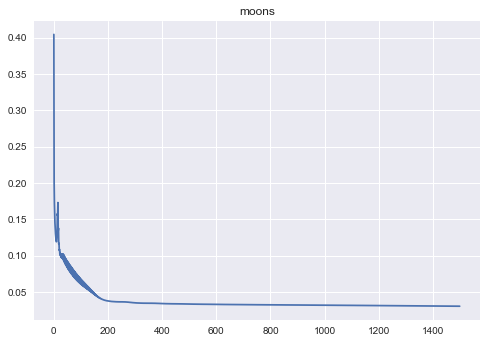

Efficiency=0.972
(10000, 2)
(10000,)


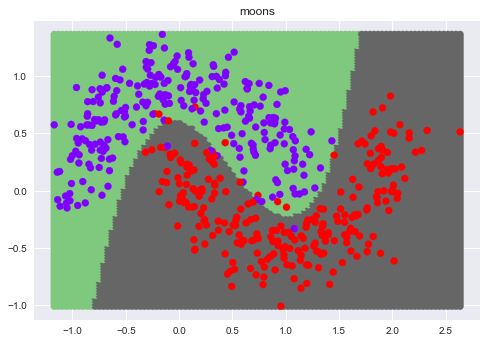


circles



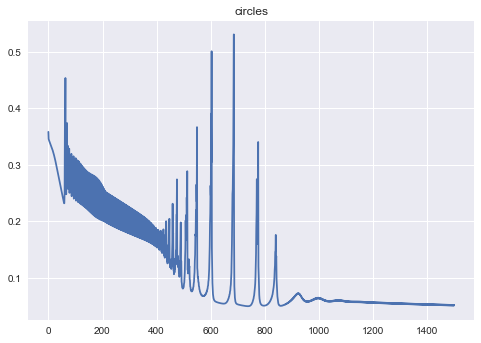

Efficiency=0.958
(10000, 2)
(10000,)


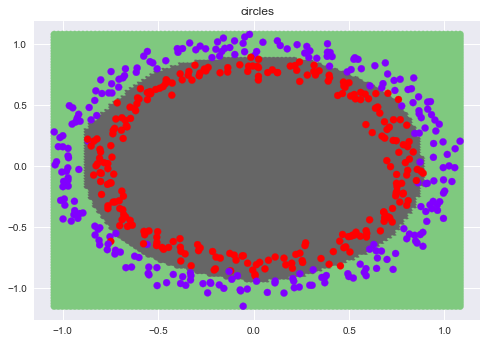


blobs



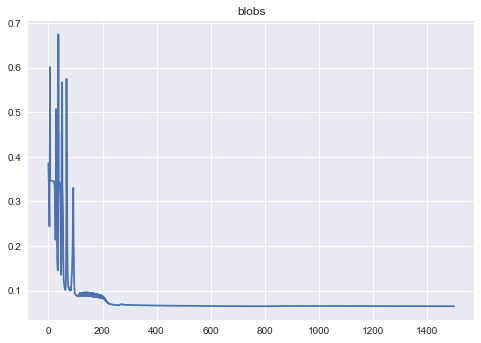

Efficiency=0.948
(10000, 2)
(10000,)


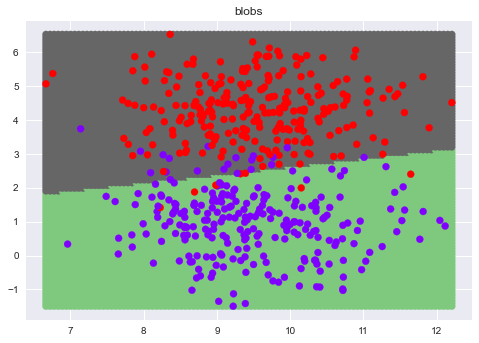

In [122]:
datasets=['moons','circles','blobs']
for d in datasets:
    print("\n{}\n".format(d))
    X,Y=generate_dataset(d)
    my_model=NeuralNetwork(2,2,[10,5],'tanh')
    losses=train(my_model,X,Y,2,1500,0.001,False)
    Y_=my_model.predict(X)
    plt.plot(losses)
    plt.title(d)
    plt.show()
    
    print("Efficiency={}".format(np.mean(np.array(Y_==Y))))
    
    visualize_decision_boundry(X,Y,my_model)
    plt.title(d)
    plt.show()